In [140]:
import numpy as np

f = lambda x : x ** 2 - 4 * x + 6

In [141]:
x = np.linspace(-1, 6, 100)
y = f(x)

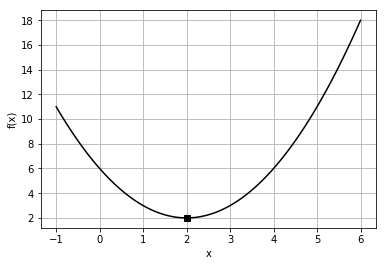

In [142]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'k-')
plt.plot(2, 2, 'sk')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [143]:
grad_f = lambda x : 2 * x - 4
x0 = 0.0
MaxIter = 10
learning_rate = 0.25

print("step \t x \t f(x)")
print("{:02d} \t {:6.5f} \t {:6.5f}".format(0, x0, f(x0)))

step 	 x 	 f(x)
00 	 0.00000 	 6.00000


In [144]:
for i in range(MaxIter) :
    x1 = x0 - learning_rate * grad_f(x0)
    x0 = x1
    
    print("{:02d} \t {:6.5f} \t {:6.5f}".format(i+1, x0, f(x0)))

01 	 1.00000 	 3.00000
02 	 1.50000 	 2.25000
03 	 1.75000 	 2.06250
04 	 1.87500 	 2.01562
05 	 1.93750 	 2.00391
06 	 1.96875 	 2.00098
07 	 1.98438 	 2.00024
08 	 1.99219 	 2.00006
09 	 1.99609 	 2.00002
10 	 1.99805 	 2.00000


In [148]:
import numpy as np

np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [149]:
def loss(w, x_set, y_set) :
        N = len(x_set)
        val = 0.0
        
        for i in range(len(x_set)) :
            val += 0.5 * (w[0] * x_set[i] + w[i] - yset[i]) ** 2
        
        return val / N

In [150]:
def loss_grad(w, x_set, y_set) :
        N = len(x_set)
        val = np.zeros(len(w))
        
        for i in range(len(x_set)) :
            er = w[0] * x_set[i] + w[1] - y_set[i]
            val += er * np.array([x_set[1], 1.0])
        
        return val / N

In [151]:
idx = np.arange(len(x_train))

print(idx)

np.random.shuffle(idx)

print(idx)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


In [152]:
import numpy as np

x_train = np.linspace(-1, 1, 50)
f = lambda x : 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [153]:
batch_size = 5
Ir = 0.1
MaxEpochs = 10
paths = []
batch_loss = []
w0 = np.array([4.0, -1.0])
serch_direction = np.zeros_like(w0)

In [154]:
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)

shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

print(x_train, y_train)

(array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ]), array([0.76291903, 0.57788914, 0.54810959, 0.7653102 , 0.88376508,
       0.86202445, 0.93378416, 0.81780495, 0.87496602, 0.78422473,
       1.08660435, 0.90733391, 0.849739  , 0.79591566, 1.00206985,
       1.10908311, 1.00904081, 1.12700375, 1.15594681, 0.94143808,
       1.

In [155]:
def loss(w, x_set, y_set) :
    N = len(x_set)
    val = 0.0
    
    for i in range(len(x_set)) :
        val += 0.5 * ((w[0] * x_set[i] + w[1]) - y_set[i]) ** 2
    return val / N

In [156]:
from generate_batches import generate_batches

In [157]:
def loss_grad(w, x_set, y_set) :
    N = len(x_set)
    val = np.zeros(len(w))
    
    for i in range(len(x_set)) :
        er = (w[0] * x_set[i] + w[1]) - y_set[i]
        val += er * np.array([x_set[i], 1.0])
        
    return val / N

In [158]:
for epoch in range(MaxEpochs + 1) :
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train) :
# for x_batch, y_batch in generate_batches(batch_size, x_train, y_train) :
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch)
        serch_direction = -grad
        Ir = Ir
        dw = Ir * serch_direction
        w0 = w0 + dw
    
    print("{:2d} \t {} \t {:5.4f}".format(epoch, w0, loss(w0, x_train, y_train)))

 0 	 [2.93268455 0.42186099] 	 1.3144
 1 	 [2.19912794 0.91851884] 	 0.5320
 2 	 [1.69103304 1.09346429] 	 0.2478
 3 	 [1.33772146 1.15610018] 	 0.1220
 4 	 [1.0915585  1.17922051] 	 0.0624
 5 	 [0.91988154 1.18822393] 	 0.0337
 6 	 [0.80009379 1.19203732] 	 0.0198
 7 	 [0.71649161 1.19384329] 	 0.0130
 8 	 [0.65813704 1.1948075 ] 	 0.0098
 9 	 [0.61740296 1.1953779 ] 	 0.0082
10 	 [0.58896792 1.19574051] 	 0.0074


In [159]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [199]:
def contour_with_path(l, x, y, paths, norm = LogNorm(), level = np.logspace(0, 5, 35), minima = None) :
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize = (7, 4))
    ax.contour(x, y, 1, levels = level, norm = norm, cmap = plt.cm.jet)
    ax.quver(paths[0, :-1], paths[1, :-1], paths[0, 1:]-paths[0, :-1], paths[1, 1:] - paths[1, :-1], scale_units = 'xy',
            angles = 'xy', scale = 1, color = 'k')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()
    
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0, W1)
LOSSW = W0 * 0

for i in range(W0.shape[0]) :
    for j in range(W1.shape[1]) :
        wij = np.array([W0[i, j], W1[i, j]])
        LOSSW[i, j] = loss(wij, x_train, y_train)

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

TypeError: 'Tensor' object is not callable

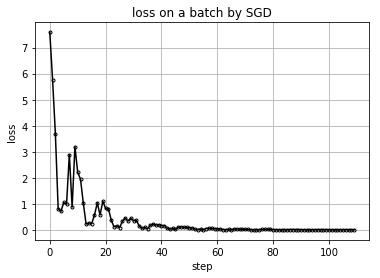

In [168]:
plt.plot(batch_loss, '.-k', markerfacecolor = 'none')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()

In [169]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [189]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
y_train = 0.5 * x_train + 1.0 + 0.4 * np.random.rand(len(x_train))
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

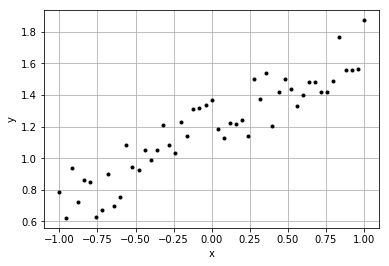

In [190]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [175]:
MaxEpochs = 1025
Ir = 0.25

w = tf.Variable(tf.ones([1, 1]), dtype = tf.float32)
b = tf.Variable(tf.ones([1]), dtype = tf.float32)
x = tf.placeholder(tf.float32, (None, 1))
y = tf.placeholder(tf.float32, (None, 1))
yhat = tf.matmul(x, w) + b

loss = tf.reduce_mean(tf.square(yhat - y))
optimizer = tf.train.GradientDescentOptimizer(Ir)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()   # 이놈을 제일 마지막에..

In [191]:
with tf.Session() as sess :
    sess.run(init)
    
    for epoch in range(MaxEpochs) :
        if epoch % 5 == 0 :
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict = {x : x_train, y : y_train})
            print(curr_w, curr_b, curr_loss)
        sess.run(train, feed_dict = {x : x_train, y : y_train})
    w_tf_gd, b_tf_gd = sess.run([w, b])

(array([[1.]], dtype=float32), array([1.], dtype=float32), 0.14998727)
(array([[0.6727577]], dtype=float32), array([1.1888978], dtype=float32), 0.028191052)
(array([[0.54642326]], dtype=float32), array([1.1948009], dtype=float32), 0.015662618)
(array([[0.49765092]], dtype=float32), array([1.1949854], dtype=float32), 0.013800872)
(array([[0.478822]], dtype=float32), array([1.1949911], dtype=float32), 0.013523399)
(array([[0.47155294]], dtype=float32), array([1.1949912], dtype=float32), 0.013482046)
(array([[0.46874666]], dtype=float32), array([1.1949912], dtype=float32), 0.013475881)
(array([[0.4676633]], dtype=float32), array([1.1949912], dtype=float32), 0.013474964)
(array([[0.467245]], dtype=float32), array([1.1949912], dtype=float32), 0.013474825)
(array([[0.46708354]], dtype=float32), array([1.1949912], dtype=float32), 0.013474803)
(array([[0.4670212]], dtype=float32), array([1.1949912], dtype=float32), 0.0134748025)
(array([[0.46699712]], dtype=float32), array([1.1949912], dtype=f

In [193]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

np.random.seed(327)
x_train = np.linspace(-1, 1, 50)
y_train = x_train**2 + 0.25 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

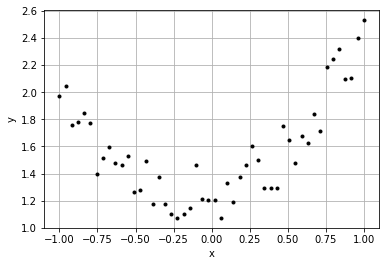

In [194]:
plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [225]:
features = np.array([[xval**2], xval] for xval in x_train)
labels = y_train.reshape(-1, 1)

In [196]:
#print(labels)
print(features)

<generator object <genexpr> at 0x7f64c455e960>


In [210]:
w = tf.Variable(tf.ones([2, 1]))
b = tf.Variable(tf.ones([1]))

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
yhat = tf.matmul(x, w) + b
loss = tf.reduce_mean(tf.square(yhat - y))


MaxEpoch = 25
batch_size = 10
lr = 0.25
optimizer = tf.train.GradientDescentOptimizer(lr)
train = optimizer.minimize(loss)

In [209]:
np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)

shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels[shuffled_id]

IndexError: too many indices for array

In [183]:
init = tf.global_variables_initializer()

with tf.Session() as sess :
    sess.run(init)
    
    for epoch in range(25) :
        if epoch % 5 == 0 :
            curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict = {x : features, y : labels})
            print(curr_w.reshape(1, -1), curr_b, curr_loss)
            
        for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train) :
            sess.run(train, feed_dict = {x : x_batch, y : y_batch})
       
    w_tf_sgd, b_tf_sgd = sess.run([w, b])
    prediction_values = sess.run(yhat, feed_dict = {x : features})

print(prediction_values)

TypeError: float() argument must be a string or a number

In [221]:
features[1]

IndexError: too many indices for array